# Exercises

Using the following data set to investigate the relationship between Age and Wing Length, and use the data to generate answers to the prompts below:

Age	| Wing Length
-- | --
3	| 1.4
4	| 1.5
5	| 2.2
6	| 2.4
7	| 3.1
8	| 3.2
9	| 3.2
11	| 3.9
12	| 4.1
14	| 4.7
15	| 4.5
16	| 5.2
17 | 5.0



##### 1\. Plot the relationship between Age and Wing Length.

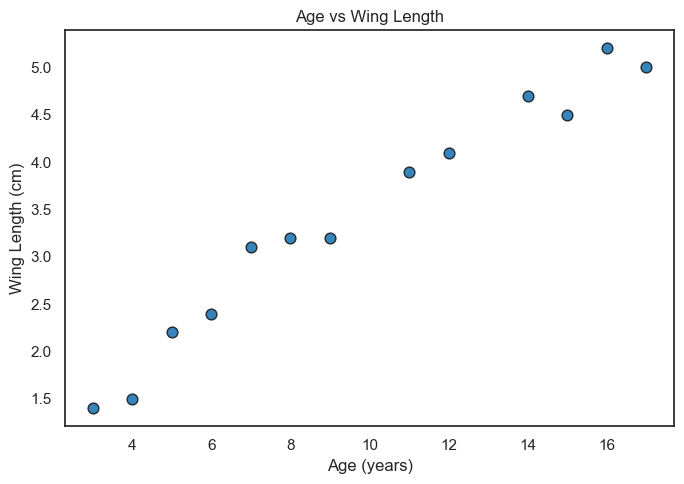

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from scipy import stats

# Data for Age and Wing Length
ages = [3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17]
wing_lengths = [1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0]

sns.set(style="white")
plt.figure(figsize=(7,5))
plt.scatter(ages, wing_lengths, s=60, color='tab:blue', edgecolor='k', alpha=0.9)
plt.title('Age vs Wing Length')
plt.xlabel('Age (years)')
plt.ylabel('Wing Length (cm)')
plt.tight_layout()
plt.show()

##### 2\. Calculate and plot the regression line.

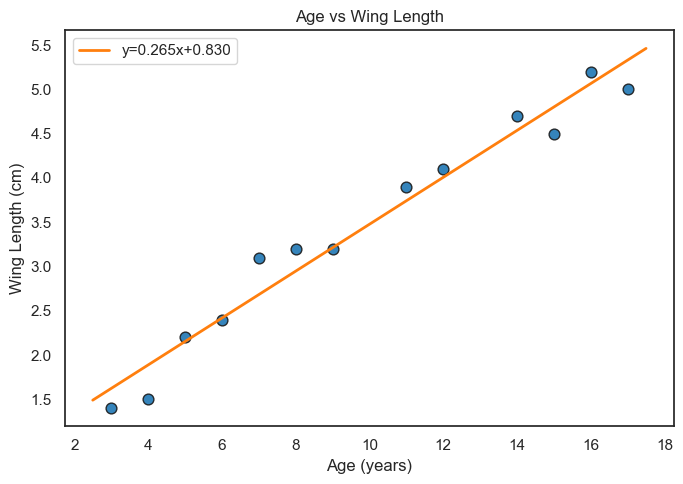

In [32]:
#fits a degree‑1 polynomial (a line) by ordinary least squares and returns the coefficient array
coeffs = np.polyfit(ages, wing_lengths, 1)  # coeffs[0]=slope, coeffs[1]=intercept
slope, intercept = coeffs[0], coeffs[1] #assigns the first coefficient to the slope (m) and the second to the intercept (b), so the fitted line is y = m*x + b

# Build polynomial function and plot the regression line 
p = np.poly1d(coeffs)
plt.figure(figsize=(7,5))
plt.scatter(ages, wing_lengths, s=60, color='tab:blue', edgecolor='k', alpha=0.9)
ages_line = np.linspace(min(ages)-0.5, max(ages)+0.5, 100)
plt.plot(ages_line, p(ages_line), color='tab:orange', lw=2, label=f"y={slope:.3f}x+{intercept:.3f}")
plt.title('Age vs Wing Length')
plt.xlabel('Age (years)')
plt.ylabel('Wing Length (cm)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

##### 3\. Can you reject $H_0:b=0$?

In [45]:
# Residuals and standard error calculation
ages = np.asarray(ages)
wing_lengths = np.asarray(wing_lengths)
n = len(ages)
yhat = slope * ages + intercept
residuals = wing_lengths - yhat
df = n - 2
sse = np.sum(residuals**2)
mse = sse / df
sx = np.sum((ages - np.mean(ages))**2)
se_slope = sqrt(mse / sx)
t_stat = slope / se_slope

# Print t-test results
print('t-test for H0: slope = 0')
print(f'  slope = {slope:.6f}')
print(f'  std err (slope) = {se_slope:.6f}')
print(f'  t-stat = {t_stat:.6f}')
alpha = 0.05
if p_value is not None and p_value < alpha:
    print('Conclusion: reject H0: slope = 0 at alpha=0.05')
else:
    print('Conclusion: fail to reject H0: slope = 0 at alpha=0.05')


t-test for H0: slope = 0
  slope = 0.264684
  std err (slope) = 0.015559
  t-stat = 17.011783
Conclusion: reject H0: slope = 0 at alpha=0.05


##### 4\. Calculate and plot the confidence intervals on the slope of the regression.

95% CI for slope: (0.298929, 0.230439)


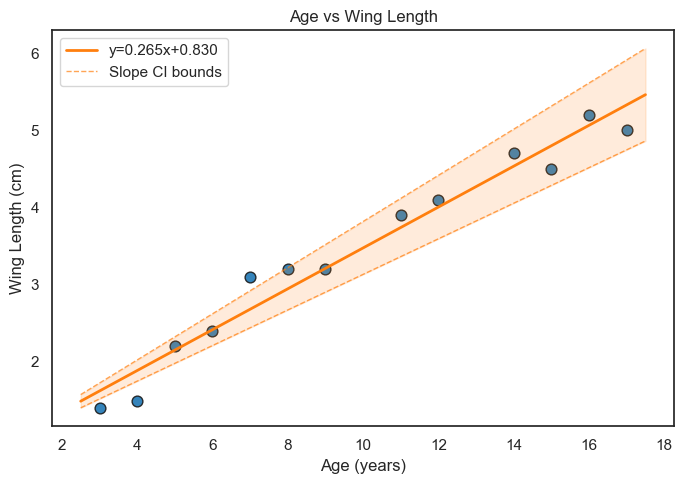

In [ ]:
# Compute 95% CI for slope 
t_crit = stats.t.ppf(alpha/2, df) #0.05/2, df =2
ci_low = slope - t_crit * se_slope
ci_high = slope + t_crit * se_slope
print(f'95% CI for slope: ({ci_low:.6f}, {ci_high:.6f})')

# Plot regression line and CI lines
plt.figure(figsize=(7,5))
ages_line = np.linspace(min(ages)-0.5, max(ages)+0.5, 200)

# predictions for central slope and slopes at CI bounds
y_line = slope * ages_line + intercept
y_line_low = ci_low * ages_line + intercept
y_line_high = ci_high * ages_line + intercept
plt.scatter(ages, wing_lengths, color='tab:blue', edgecolor='k', s=60, alpha=0.9)
plt.plot(ages_line, y_line, color='tab:orange', lw=2, label=f'y={slope:.3f}x+{intercept:.3f}')
plt.plot(ages_line, y_line_low, color='tab:orange', lw=1, ls='--', alpha=0.7, label='Slope CI bounds')
plt.plot(ages_line, y_line_high, color='tab:orange', lw=1, ls='--', alpha=0.7)
plt.fill_between(ages_line, y_line_low, y_line_high, color='tab:orange', alpha=0.15)
plt.title('Age vs Wing Length')
plt.xlabel('Age (years)')
plt.ylabel('Wing Length (cm)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

##### 4\. Calculate $r^2$ (the coefficient of determination)

In [55]:
# fitted polynomial from earlier
coeffs = np.polyfit(ages, wing_lengths, 1)
p = np.poly1d(coeffs)
yhat = p(ages)
ybar = np.mean(wing_lengths)
ssreg = np.sum((yhat - ybar)**2)
sstot = np.sum((wing_lengths - ybar)**2)
r_squared = ssreg / sstot
print(f'r^2 = {r_squared:.6f}')

r^2 = 0.963382


##### 5\. Calculate Pearson's *r*.

In [75]:
# compute Pearson correlation coefficient 
r=np.corrcoef(ages, wing_lengths)
print(f'r={r[0,1]:.4f}')

r=0.9815


##### 6\. Add some noise to the data and see how the regression changes.

Original fit:
  slope = 0.264684, intercept = 0.829624, r^2 = 0.963382
Noisy fit:
  slope = 0.280177, intercept = 0.556645, r^2 = 0.602498


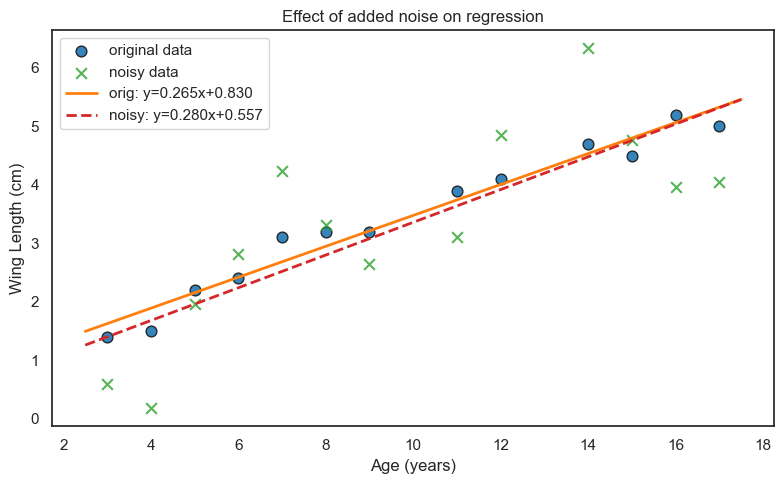

In [79]:
# create noisy data (adjust noise_sd to increase/decrease noise)
rng = np.random.default_rng(5)  # fixed seed for reproducibility
noise_sd = 1
wing_noisy = wing_lengths + rng.normal(0, noise_sd, size=wing_lengths.shape)

# fit to noisy data
coeffs_noisy = np.polyfit(ages, wing_noisy, 1)
slope_noisy, intercept_noisy = coeffs_noisy[0], coeffs_noisy[1]
p_noisy = np.poly1d(coeffs_noisy)
yhat_noisy = p_noisy(ages)
ssreg_noisy = np.sum((yhat_noisy - np.mean(wing_noisy))**2)
sstot_noisy = np.sum((wing_noisy - np.mean(wing_noisy))**2)
r2_noisy = ssreg_noisy / sstot_noisy

# print comparisons
print('Original fit:')
print(f'  slope = {slope_orig:.6f}, intercept = {intercept_orig:.6f}, r^2 = {r2_orig:.6f}')
print('Noisy fit:')
print(f'  slope = {slope_noisy:.6f}, intercept = {intercept_noisy:.6f}, r^2 = {r2_noisy:.6f}')

# plot original data, noisy data, and both regression lines
plt.figure(figsize=(8,5))
plt.scatter(ages, wing_lengths, label='original data', color='tab:blue', edgecolor='k', s=60, alpha=0.9)
plt.scatter(ages, wing_noisy, label='noisy data', color='tab:green', marker='x', s=60, alpha=0.8)
ages_line = np.linspace(min(ages)-0.5, max(ages)+0.5, 200)
plt.plot(ages_line, p_orig(ages_line), color='tab:orange', lw=2, label=f'orig: y={slope_orig:.3f}x+{intercept_orig:.3f}')
plt.plot(ages_line, p_noisy(ages_line), color='tab:red', lw=2, ls='--', label=f'noisy: y={slope_noisy:.3f}x+{intercept_noisy:.3f}')
plt.title('Effect of added noise on regression')
plt.xlabel('Age (years)')
plt.ylabel('Wing Length (cm)')
plt.legend()
plt.tight_layout()
plt.show()